# Canada Refugee Statistics Exploratory Data Analysis

In this project we perform Exploratory Data Analysis **(EDA)** on **UNHCR Refugee Statistics** for **Canada** from **2012-2022.**


_Original dataset can be downloaded from the [unhcr.org](https://www.unhcr.org/refugee-statistics/download/?url=8tIY7I) website._

## Analysis Questions

1. From which countries has Canada admitted the highest number of refugees?
2. What are the total number of resettled refugees in Canada per year?
3. What are the countries of origin for the majority of asylum claims made in Canada?
4. What is the total number of asylum claims made in Canada every year?
5. What are the general trends in refugee and asylum statistics from 2012-2022?

## Important Distinction: Refugees vs. Asylum Seekers

**The 1951 Refugee Convention defines a refugee as:** “A person who, owing to a well-founded fear of being persecuted for reasons of race, religion, nationality, membership of a particular social group or political opinion, is outside the country of his nationality and is unable or, owing to such fear, unwilling to avail himself of the protection of that country”.
> - In this data set, UNHCR-Refugees refers to people who have been resettled to Canada, and arrive to the country as permanent residents.
    
**An asylum seeker (or claimant) on the other hand is defined as** someone who is seeking international protection but has not yet been granted refugee status. 
> - In this data set, asylum-seeker refers to someone who has arrived in Canada as a visitor, worker, student, etc., through official or unofficial ports of entry, and who applied for protection from within Canada (after arrival). 

_For more information and definitions, visit the [unhcr.ca](https://www.unhcr.ca/about-us/frequently-asked-questions/#:~:text=An%20asylum%2Dseeker%20is%20someone,yet%20been%20granted%20refugee%20status.) website._

## Notebook Content

1. **Step 1:** Install + Import Necessary Libraries
2. **Step 2:** Reading, Exploring and Preparing Data
3. **Step 3:** Exploratory Data Analysis + Visualization
4. **2012- 2022 Canada Refugee Statistics EDA Results Summary**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('can-stats-2012-22.csv')

In [4]:
df

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70
...,...,...,...,...,...
1865,2022,Venezuela (Bolivarian Republic of),1497,2104,3601
1866,2022,Western Sahara,5,0,5
1867,2022,Yemen,450,452,902
1868,2022,Zambia,23,25,48


In [4]:
df.head()

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70


# Data cleaning

In [5]:
df.isnull().sum()

Year                 0
Country-of-origin    0
UNHCR-refugees       0
Asylum-seekers       0
total-count          0
dtype: int64

In [6]:
df.dtypes

Year                  int64
Country-of-origin    object
UNHCR-refugees        int64
Asylum-seekers        int64
total-count           int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df['UNHCR-refugees'].unique()

array([ 2609,  1764,   513,   753,    40,   597,   258,   200,     6,
           0,   598,     5,    50,  2315,    17,    56,  1917,    15,
          19,   141,   300,   160,   109,   175,    91,   928,   176,
          63,   543, 16813,   124,   864,   287,  4211, 17563,   282,
        1708,   222,   233,    41,   148,   216,    12,  1547,  2059,
         395,    55,    59,   674,    69,   504,    89,   356,    24,
          14,   292,   770,   914,   638,  6798,   596,    57,   766,
         420,  5287,   351,     7,  3212,  1745,   673,   402,    20,
         149,   996,   128,   119,    64,   120,   241,   551,  1104,
       13705,   103,    44,    10,   299,    97,   187,  5995,    99,
         214,    23,   127,   169,   276,    38,  1128,    34,   138,
        3990, 11605,    47,    48,  1905,   322,   359,   690,    35,
        1756,  1654,  1122,   131,   183,    27,   206,    39,  3459,
          16,   400,  1738,  1100,     9,    22,    11,   533,    18,
         251,   204,

In [48]:
#country with the highest number of refugees
highest_country = df['UNHCR-refugees'].groupby(by=df['Country-of-origin']).sum().sort_values(ascending=False)[0:15].reset_index()
highest_country

,Country-of-origin,UNHCR-refugees
0,Colombia,108416
1,China,98586
2,Ukraine,88376
3,Pakistan,74737
4,Haiti,70956
5,Sri Lanka,66343
6,Nigeria,60554
7,Mexico,51072
8,Türkiye,42533
9,Iran (Islamic Rep. of),40881


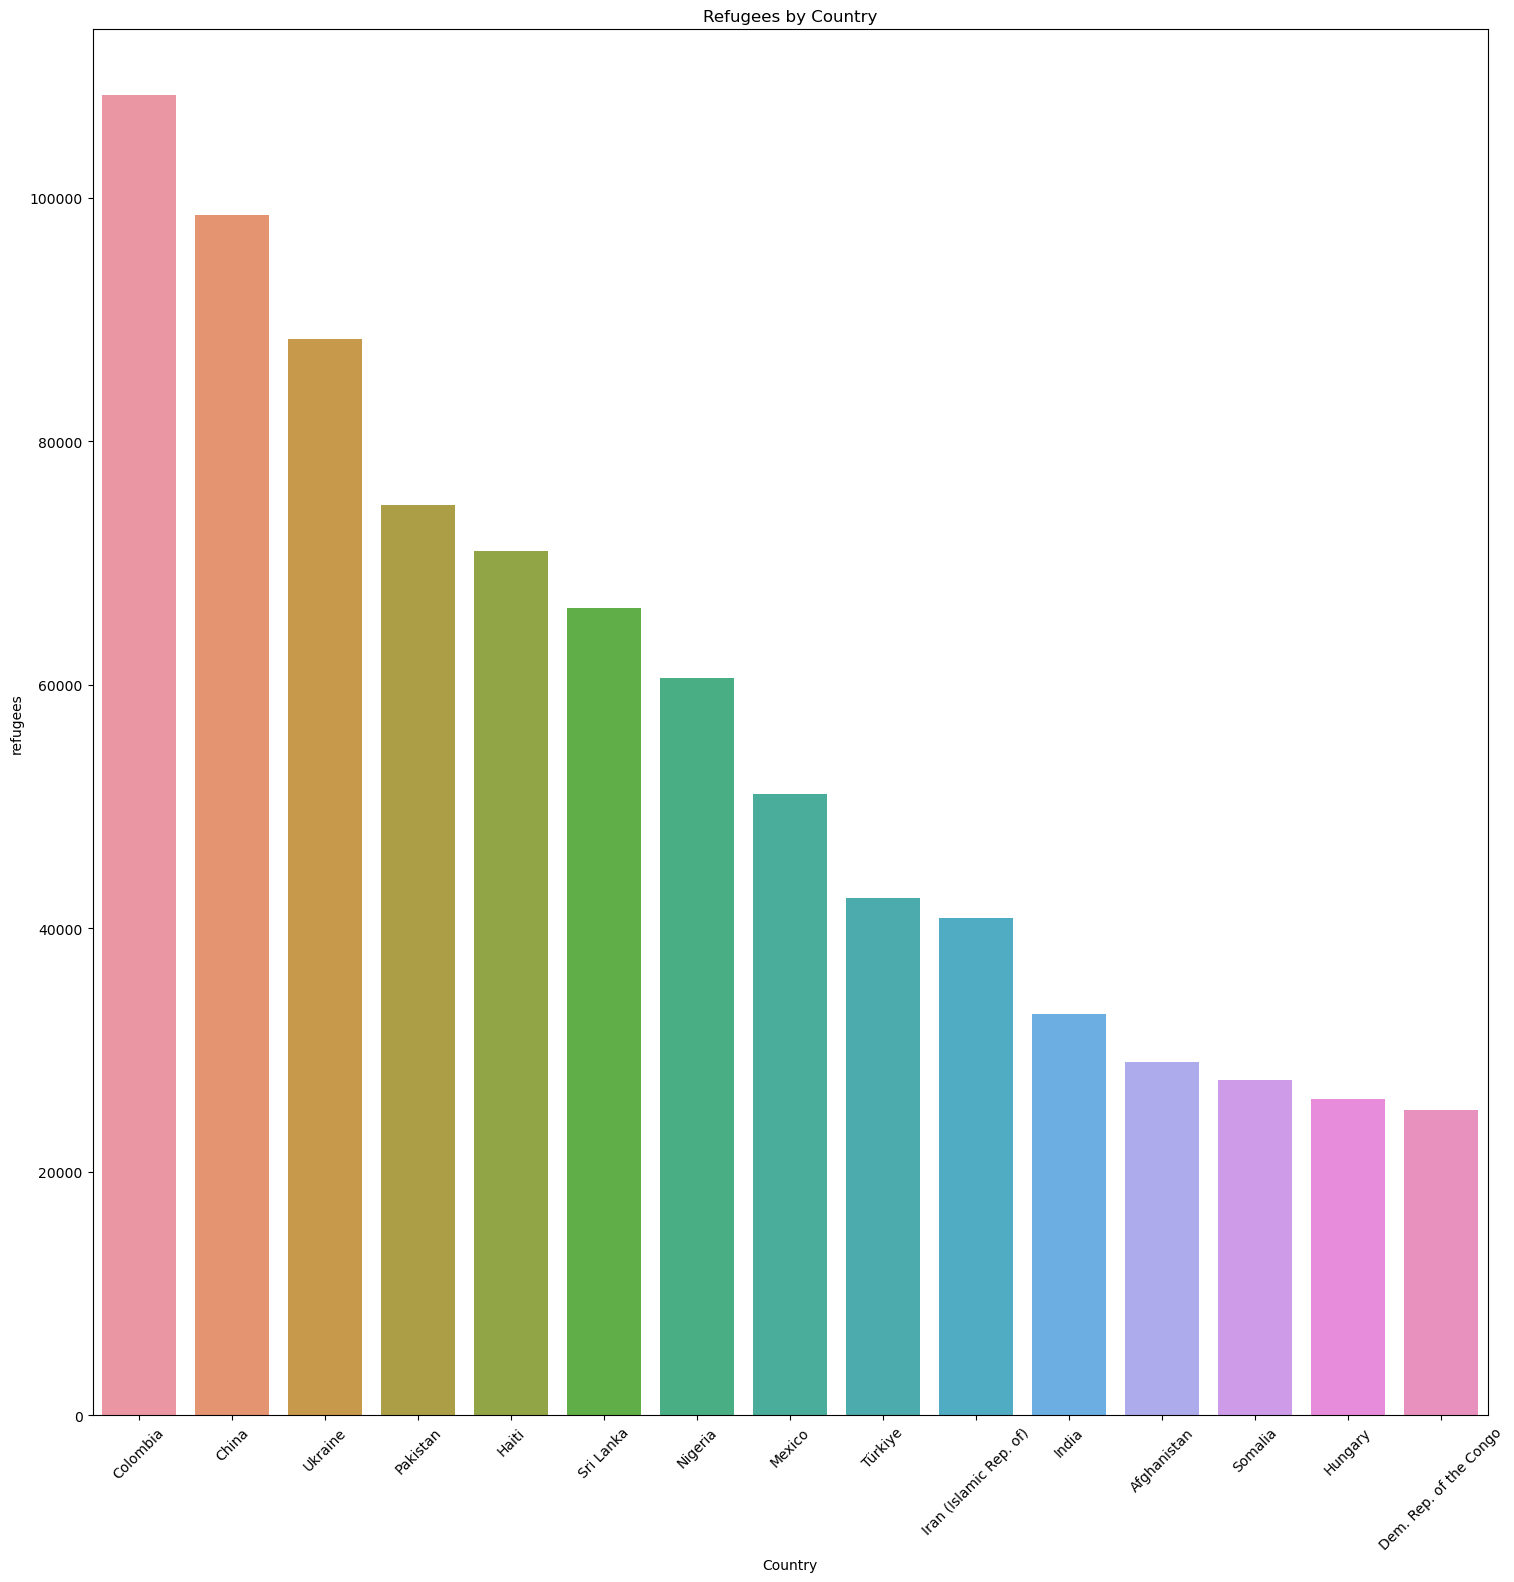

In [49]:
plt.figure(figsize=(18,18))
sns.barplot(x='Country-of-origin',y='UNHCR-refugees',data=highest_country)
plt.title('Refugees by Country')
plt.xlabel('Country')
plt.ylabel('refugees')
plt.xticks(rotation=45)
plt.show()

In [5]:
resettled_refugee = df['UNHCR-refugees'].groupby(by=df['Year']).sum().sort_values(ascending=False).reset_index()
resettled_refugee

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2022,140621
4,2015,135890
5,2021,130125
6,2018,114101
7,2020,109214
8,2017,104768
9,2019,101757


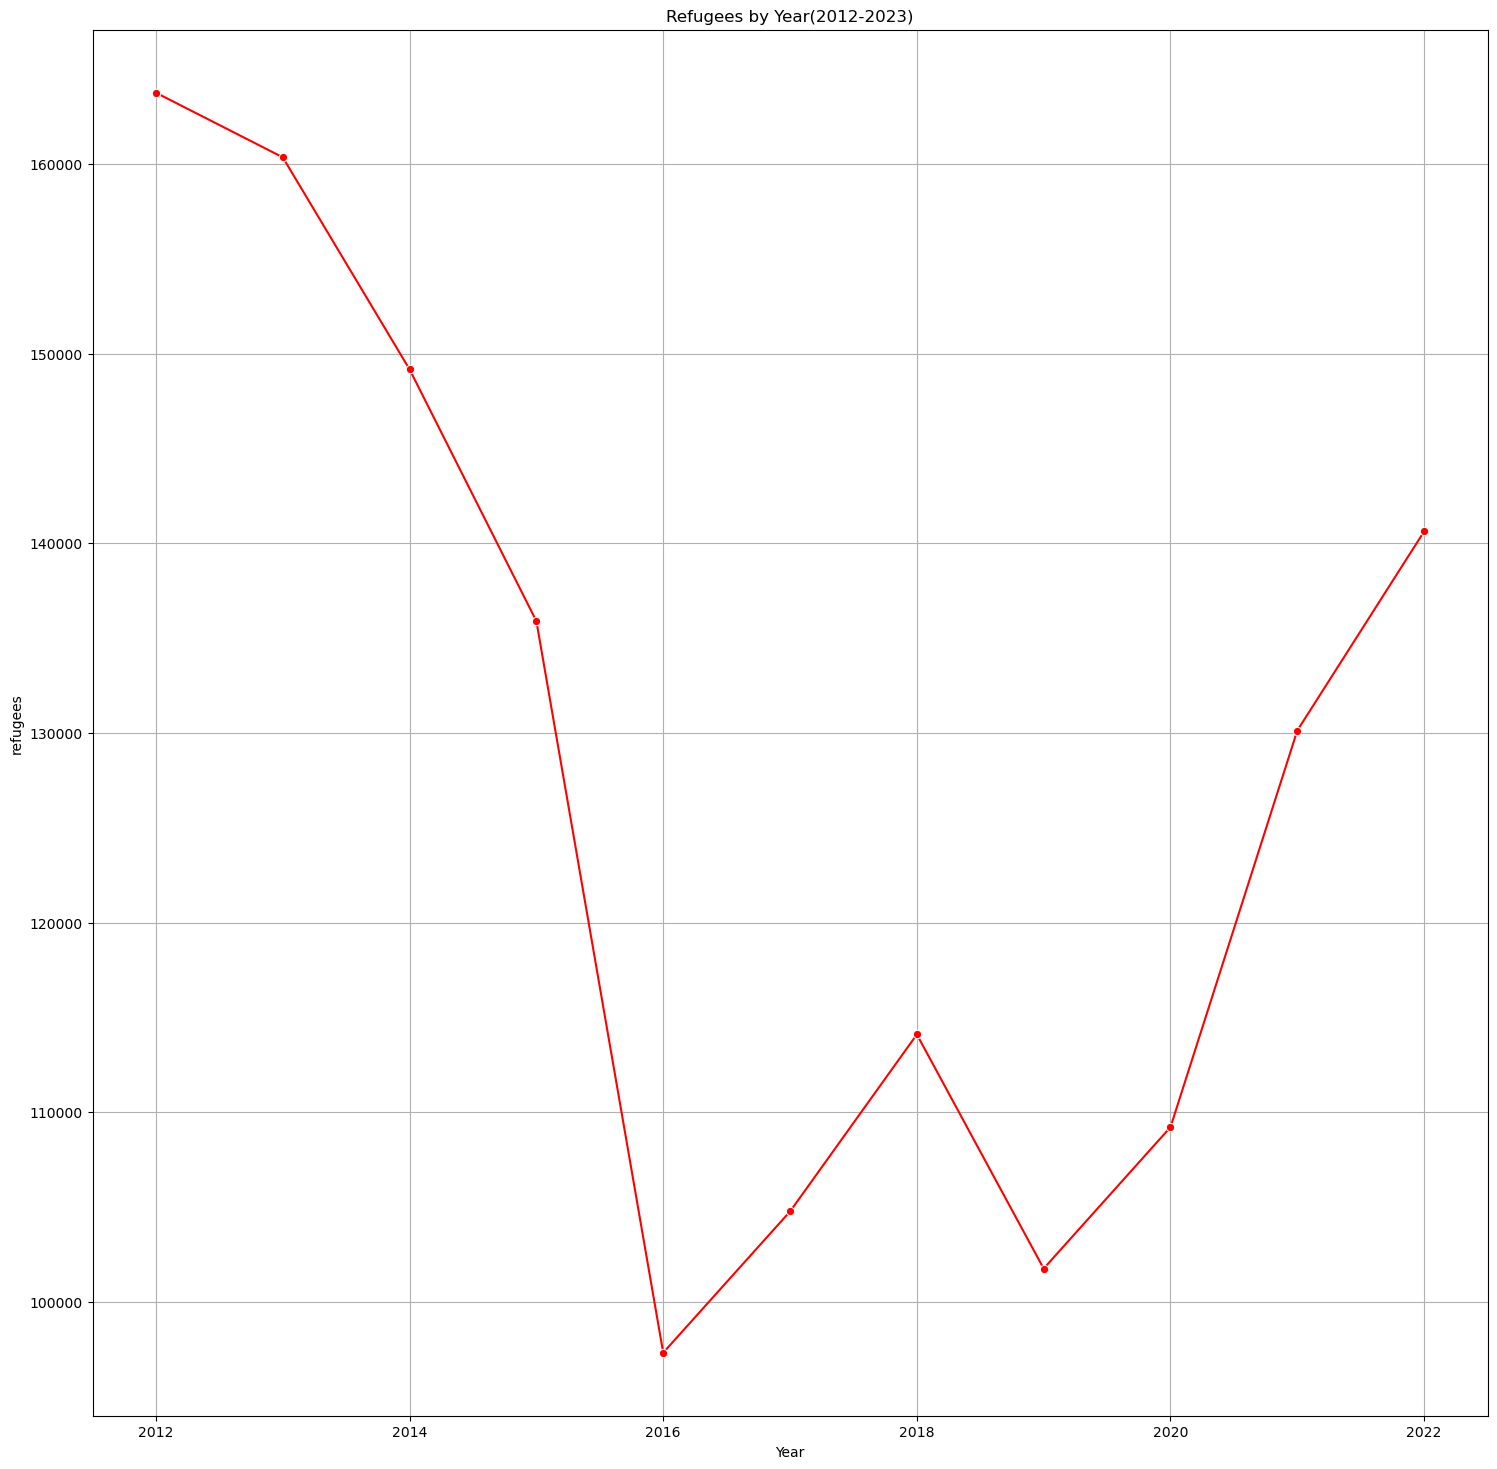

In [9]:
plt.figure(figsize=(18,18))
sns.lineplot(x='Year',y='UNHCR-refugees',data=resettled_refugee,marker='o',color='red')
plt.title('Refugees by Year(2012-2023)')
plt.xlabel('Year')
plt.ylabel('refugees')
plt.grid(visible=True)
plt.show()

In [11]:
country_asylum = df['Asylum-seekers'].groupby(by=df['Country-of-origin']).sum().sort_values(ascending=False)[0:10].reset_index()
country_asylum

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526
7,Pakistan,19023
8,Türkiye,18166
9,Iran (Islamic Rep. of),15011


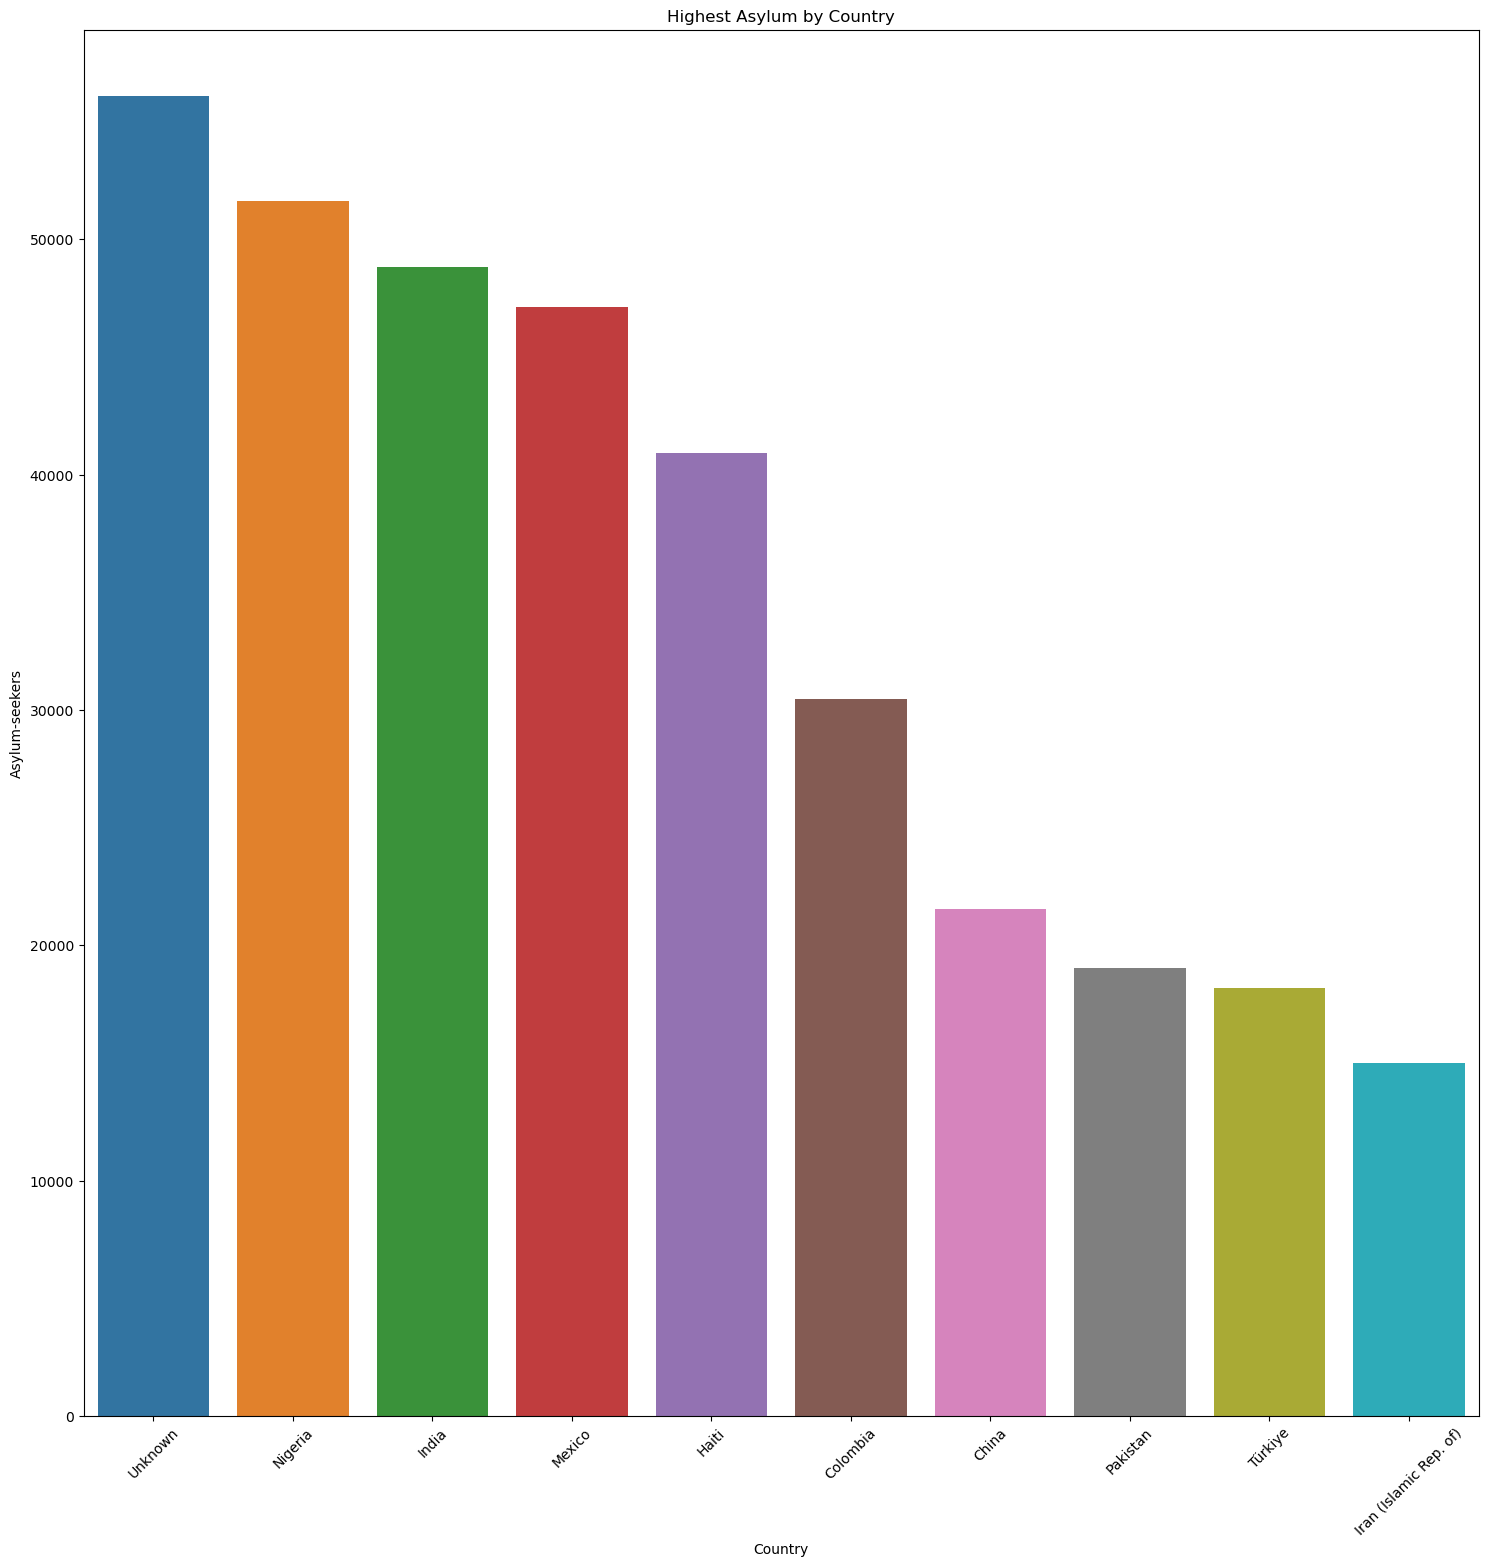

In [12]:
plt.figure(figsize=(18,18))
sns.barplot(x='Country-of-origin',y='Asylum-seekers',data=country_asylum)
plt.title('Highest Asylum by Country')
plt.xlabel('Country')
plt.ylabel('Asylum-seekers')
plt.xticks(rotation=45)
plt.show()

In [13]:
df.corr()

C:\Users\THINK PAD\AppData\Local\Temp\ipykernel_7176\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,UNHCR-refugees,Asylum-seekers,total-count
Year,1.000000,-0.024037,0.144239,0.037578
UNHCR-refugees,-0.024037,1.000000,0.278267,0.924737
Asylum-seekers,0.144239,0.278267,1.000000,0.622897
total-count,0.037578,0.924737,0.622897,1.000000
